<a href="https://colab.research.google.com/github/IvanLisun/indz1/blob/main/Imbalanced_Classification_Advance_Algorithms%206%D0%BF%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2><center>Imbalanced Classification</center></h2>
<div style="font-family:verdana; word-spacing:1.5px;">
Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance. The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.
</div>    

![image.png](attachment:image.png)


<p style="font-family:verdana; word-spacing:1.5px;font-size:15px">Notebook Link for Over & Under Sampling techniques for Imbalanced classification :</p>
<a href='https://www.kaggle.com/ashrafkhan94/imbalanced-classification-over-under-sampling?scriptVersionId=52762319'>https://www.kaggle.com/ashrafkhan94/imbalanced-classification-over-under-sampling</a>
<br><br>
<p style="font-family:verdana; word-spacing:1.5px;font-size:15px">Notebook Link for Cost Sensitive Algorithms for Imbalanced classification :</p>
<a href='https://www.kaggle.com/ashrafkhan94/imbalanced-classification-cost-sensitive-algrthms?scriptVersionId=52794216'>https://www.kaggle.com/ashrafkhan94/imbalanced-classification-cost-sensitive-algrthms</a>


<h3><center>1. Probability Threshold Moving</center></h3>
<div style="font-family:verdana; word-spacing:1.5px;">
    Many machine learning algorithms are capable of predicting a probability or scoring of class membership, and this must be interpreted before it can be mapped to a crisp class label. This is achieved by using a threshold, such as 0.5, where all values equal or greater than the threshold are mapped to one class and all other values are mapped to another class.<br><br>
For those classification problems that have a severe class imbalance, the default threshold can result in poor performance.<br><br>
    In some cases, such as when using ROC Curves and Precision-Recall Curves, the best or optimal threshold for the classifier can be calculated directly. In other cases, it is possible to use a grid search to tune the threshold and locate the optimal value.<br><br>
<h4 style="font-family:verdana; word-spacing:1.5px;font-size:16px">1. Converting Probabilities to Class Labels</h4>

The decision for converting a predicted probability or scoring into a class label is governed by a parameter referred to as the decision threshold, discrimination threshold, or simply the threshold. The default value for the threshold is 0.5 for normalized predicted probabilities or scores in the range between 0 or 1.<br>
<h4 style="font-family:verdana; word-spacing:1.5px;font-size:16px">2. Threshold-Moving for Imbalanced Classification</h4>
We have to search a range of threshold values in order to find the best threshold.<br> In some cases, the optimal threshold can be calculated directly. Tuning or shifting the decision threshold in order to accommodate the broader requirements of the classification problem is generally referred to as threshold-moving, threshold-tuning, or simply thresholding.
    </div>

<div style="font-family:verdana; word-spacing:1.5px;">
<h3>1.1 Optimal Threshold : ROC curve</h3>
    The false-positive rate is plotted on the x-axis and the true positive rate is plotted on the y-axis and the plot is referred to as the Receiver Operating Characteristic curve, or ROC curve. <br>A diagonal line on the plot from the bottom-left to top-right indicates the curve for a no-skill classifier (predicts the majority class in all cases), and a point in the top left of the plot indicates a model with perfect skill.<br><br>
    There are many ways we could locate the threshold with the optimal balance between false positive and true positive rates. Firstly, the true positive rate is called the Sensitivity. One minus the false-positive rate is called the Specificity. The Geometric Mean or G-mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.
    </div>
    
![image.png](attachment:image.png)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from collections import Counter
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, f1_score
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

0it [00:00, ?it/s]

In [2]:
def run_model():
    X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
        n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

    trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2,
        stratify=y)
    model = LogisticRegression(solver='lbfgs')
    model.fit(trainX, trainy)

    yhat = model.predict_proba(testX)

    # Positive class values
    yhat = yhat[:, 1]

    return yhat, testy

In [3]:
yhat, testy = run_model()

fpr, tpr, thresholds = roc_curve(testy, yhat)
gmeans = np.sqrt(tpr * (1-fpr))

# locate the index of the largest g-mean
ix = np.argmax(gmeans)

print('Best Threshold=%f, G-mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.015790, G-mean=0.934


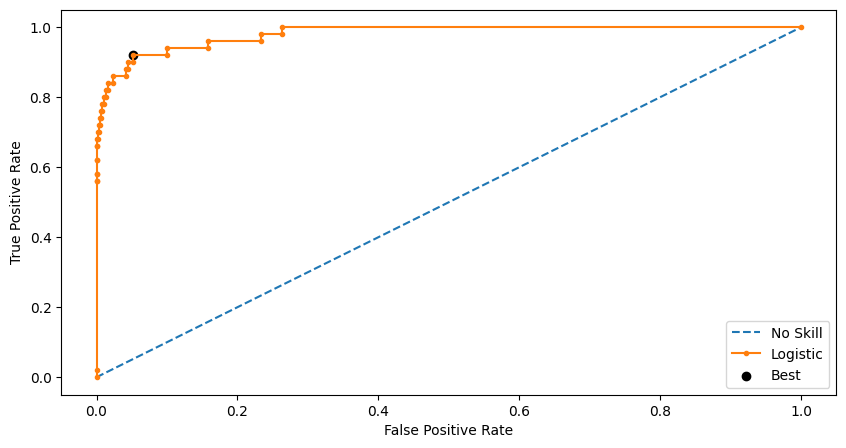

In [4]:
plt.figure(figsize=(10,5))
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')

plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

<div style="font-family:verdana; word-spacing:1.5px;">
<h3>1.2 Optimal Threshold : Precision Recall curve</h3>

Unlike the ROC Curve, a precision-recall curve focuses on the performance of a classifier on the positive (minority class) only. Precision is the ratio of the number of true positives divided by the sum of the true positives and false positives. <br><br>It describes how good a model is at predicting the positive class. Recall is calculated as the ratio of the number of true positives divided by the sum of the true positives and the false negatives.</div>

In [5]:
yhat, testy = run_model()

precision, recall, thresholds = precision_recall_curve(testy, yhat)

#Calculate f-Score
fscore = (2 * precision * recall) / (precision + recall)

# locate the index of the largest g-mean
ix = np.argmax(fscore)

print('Best Threshold=%f, G-mean=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.257034, G-mean=0.756


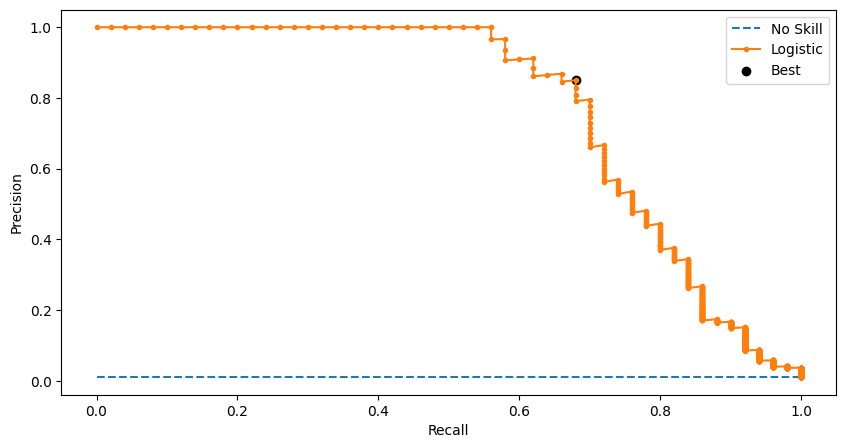

In [6]:
no_skill = len(testy[testy==1]) / len(testy)

plt.figure(figsize=(10,5))
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

<div style="font-family:verdana; word-spacing:1.5px;">
<h3>1.3 Optimal Threshold Tuning</h3>
    Sometimes, we simply have a model and we wish to know the best threshold directly.<br> In this case, we can define a set of thresholds and then evaluate predicted probabilities under each in order to find and select the optimal threshold. </div>

In [7]:
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

yhat, ytest = run_model()

thresholds = np.arange(0, 1, 0.001)

scores = [f1_score(ytest,to_labels(yhat, t)) for t in thresholds]

ix = np.argmax(scores)
print('Threshold=%.3f, F-measure=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.252, F-measure=0.75556


<h3><center>2. Probability Calibration</center></h3>
<div style="font-family:verdana; word-spacing:1.5px;">
Calibrated probabilities means that the probability reflects the likelihood of true events. This might be confusing if you consider that in classification, we have class labels that are correct or not instead of probabilities.<br><br>
    If 100 examples are predicted with a probability of 0.8, then 80 percent of the examples will have class 1 and 20 percent will have class 0, if the probabilities are calibrated.<br><br>
Probabilities are calibrated by rescaling their values so they better match the distribution observed in the training data.<br>
    Probability predictions are made on training data and the distribution of probabilities is compared to the expected probabilities and adjusted to provide a better match.<br><br>
<ul>    There are two main techniques for scaling predicted probabilities; they are Platt scaling and isotonic regression.
    <li>Platt Scaling. Logistic regression model to transform probabilities.
    <li>Isotonic Regression. Weighted least-squares regression model to transform probabilities.
    </ul>
    The scikit-learn library provides access to both Platt scaling and isotonic regression methods for calibrating probabilities via the CalibratedClassifierCV class. This is a wrapper for a model (like an SVM). The preferred scaling technique is defined via the method argument, which can be ‘sigmoid’ (Platt scaling) or ‘isotonic’ (isotonic regression).
    </div>

<h3>2.1. SVM with Calibrated probablity</h3>

<h4> Before Calibration </h4>

In [8]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)


model = SVC(gamma='scale')


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.808


<h4>After Calibration</h4>

In [9]:
from sklearn.calibration import CalibratedClassifierCV

model = SVC(gamma='scale')

calibrated = CalibratedClassifierCV(model, method='isotonic', cv=3)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


scores = cross_val_score(calibrated, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.867


<h4>Calibration + Class Weights (Heuristic - Inverse of distribution)</h4>

In [10]:
from sklearn.calibration import CalibratedClassifierCV

model = SVC(gamma='scale', class_weight='balanced')

calibrated = CalibratedClassifierCV(model, method='isotonic', cv=3)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


scores = cross_val_score(calibrated, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.964


<h3>2.2. Grid Search Probability Calibration With KNN

In [11]:
model = KNeighborsClassifier()

calibrated = CalibratedClassifierCV(model)

param_grid = dict(cv=[2,3,4], method=['sigmoid','isotonic'])


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid = GridSearchCV(estimator=calibrated, param_grid=param_grid, n_jobs=-1, cv=cv,
scoring='roc_auc')

grid_result = grid.fit(X, y)


print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_)) # report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

Best: 0.895029 using {'cv': 2, 'method': 'sigmoid'}
0.895029 (0.066617) with: {'cv': 2, 'method': 'sigmoid'}
0.893549 (0.065846) with: {'cv': 2, 'method': 'isotonic'}
0.886835 (0.070207) with: {'cv': 3, 'method': 'sigmoid'}
0.885104 (0.071671) with: {'cv': 3, 'method': 'isotonic'}
0.885167 (0.071732) with: {'cv': 4, 'method': 'sigmoid'}
0.877146 (0.077137) with: {'cv': 4, 'method': 'isotonic'}


<h3><center>3. Ensemble Algorithms</center></h3>
<h3>3.1. Bagging with Random Under-Sampling</h3>
<div style="font-family:verdana; word-spacing:1.5px;">
Oversampling the minority class in the bootstrap is referred to as OverBagging; likewise, undersampling the majority class in the bootstrap is referred to as UnderBagging, and combining both approaches is referred to as OverUnderBagging. <br><br>The imbalanced-learn library provides an implementation of UnderBagging. Specifically, it provides a version of bagging that uses a random undersampling strategy on the majority class within a bootstrap sample in order to balance the two classes. This is provided in the BalancedBaggingClassifier class.</div>

In [12]:
from imblearn.ensemble import BalancedBaggingClassifier

model = BalancedBaggingClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.965


<h3>3.2. Random Forest With Class Weighting</h3>

In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=20, class_weight='balanced')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.885


<h3>3.3. Random Forest With Bootstrap Class Weighting </h3>
<div style="font-family:verdana; word-spacing:1.5px;">
Given that each decision tree is constructed from a bootstrap sample (e.g. random selection with replacement), the class distribution in the data sample will be different for each tree. As such, it might be interesting to change the class weighting based on the class distribution in each bootstrap sample, instead of the entire training dataset. This can be achieved by setting the class weight argument to the value ‘balanced subsample’.</div>

In [14]:
model = RandomForestClassifier(n_estimators=20, class_weight='balanced_subsample')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.883


<h3>3.4. Random Forest with Random Under-Sampling</h3>


In [15]:
from imblearn.ensemble import BalancedRandomForestClassifier

model = BalancedRandomForestClassifier(n_estimators=20)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.965


<h3>3.5. Easy Ensemble</h3>

<div style="font-family:verdana; word-spacing:1.5px;">
The Easy Ensemble involves creating balanced samples of the training dataset by selecting all examples from the minority class and a subset from the majority class. Rather than using pruned decision trees, boosted decision trees are used on each subset, specifically the AdaBoost algorithm.<br><br>
    AdaBoost works by first fitting a decision tree on the dataset, then determining the errors made by the tree and weighing the examples in the dataset by those errors so that more attention is paid to the misclassified examples and less to the correctly classified examples. A subsequent tree is then fit on the weighted dataset intended to correct the errors. The process is then repeated for a given number of decision trees.
    </div>

In [16]:
from imblearn.ensemble import EasyEnsembleClassifier

model = EasyEnsembleClassifier(n_estimators=20)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.964


<h3><center>4. One-Class Classification</center></h3>

<div style="font-family:verdana; word-spacing:1.5px;">
Identifying outliers in data is referred to as outlier or anomaly detection and a subfield of machine learning focused on this problem is referred to as one-class classification.<br><br> These are unsupervised learning algorithms that attempt to model normal examples in order to classify new examples as either normal or abnormal (e.g. outliers). One-class classification algorithms can be used for binary classification tasks with a severely skewed class distribution.</div><br><br>

![image.png](attachment:image.png)

<h3>4.1. One-Class Support Vector Machines </h3>

![image.png](attachment:image.png)

<div style="font-family:verdana; word-spacing:1.5px;">
hyperparameter nu controls the sensitivity of the support vectors and should be tuned to the approximate ratio of outliers in the data, e.g. 0.01%.<br><br>
Once fit, the model can be used to identify outliers in new data. When calling the predict() function on the model, it will output a +1 for normal examples, so-called inliers, and a -1 for outliers.
<br><br>
    If we want to evaluate the performance of the model as a binary classifier, we must change the labels in the test dataset from 0 and 1 for the majority and minority classes respectively, to
+1 and -1.
    <br><br><br>
    As we are not training minority calss(label=1) for outliers, we will mark them as -1(outlier) in the testy data.<br>
    As we are training only majority class , when we prdict the model using testX data(containing both majority and minority classes), the model will assign -1 to minority class(as it was not trained), 1 to mojaority class inlier data and -1 to majority class outlier data.
<br><br><br>
 We can calculate the F-measure using the f1 score() function and specify the label of the minority class as -1 via the pos label argument.
</div>


In [17]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.999], flip_y=0, random_state=4)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2,
    stratify=y)

In [18]:
from sklearn.svm import OneClassSVM

model = OneClassSVM(gamma='scale', nu=0.01)

trainX = trainX[trainy ==0]

model.fit(trainX)

yhat = model.predict(testX)

# Marking minority class data as outlier(-1) and majority as inlier(1).

testy[testy == 1] = -1
testy[testy == 0] = 1

score = f1_score(testy, yhat, pos_label=-1)
print('F-measure: %.3f' % score)

F-measure: 0.123


<h3>4.2. Isolation Forrest </h3>

In [23]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score
import numpy as np

min_len = min(len(trainX), len(trainy))
trainX = trainX[:min_len]
trainy = trainy[:min_len]

mask = trainy == 0
trainX_clean = trainX[mask]

model = IsolationForest(contamination=0.01, random_state=42)
model.fit(trainX_clean)

yhat = model.predict(testX)

testy_transformed = np.copy(testy)
testy_transformed[testy == 1] = -1
testy_transformed[testy == 0] = 1

score = f1_score(testy_transformed, yhat, pos_label=-1)
print('F-measure: %.3f' % score)


F-measure: 0.013


the contamination is quite low and may result in many runs with an F-measure of 0.0. To improve the stability of the method on this dataset, try increasing the contamination to 0.05 or even 0.1 and re-run the example.

In [27]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score
import numpy as np

min_len = min(len(trainX), len(trainy))
trainX = trainX[:min_len]
trainy = trainy[:min_len]

mask = trainy == 0
trainX_clean = trainX[mask]

model = IsolationForest(contamination=0.1, random_state=42)
model.fit(trainX_clean)

yhat = model.predict(testX)

testy_transformed = np.copy(testy)
testy_transformed[testy == 1] = -1
testy_transformed[testy == 0] = 1

score = f1_score(testy_transformed, yhat, pos_label=-1)
print('F-measure: %.3f' % score)



F-measure: 0.181


<h3>4.3. Minimum Covariance Determinant</h3>


If the input variables have a Gaussian distribution, then simple statistical methods can be used to detect outliers. For example, if the dataset has two input variables and both are Gaussian, then the feature space forms a multi-dimensional Gaussian and knowledge of this distribution can be used to identify values far from the distribution.

In [28]:
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import f1_score
import numpy as np

# Усунення невідповідності розмірів
min_len = min(len(trainX), len(trainy))
trainX = trainX[:min_len]
trainy = trainy[:min_len]

# Вибір тільки majority класу (0) для навчання
trainX_clean = trainX[trainy == 0]

# Створення моделі
model = EllipticEnvelope(contamination=0.1, random_state=42)
model.fit(trainX_clean)

# Прогнозування
yhat = model.predict(testX)

# Перетворення міток: 1 → -1 (аномалії), 0 → 1 (нормальні)
testy_transformed = np.copy(testy)
testy_transformed[testy == 1] = -1
testy_transformed[testy == 0] = 1

# Обчислення F1-метрики для аномалій
score = f1_score(testy_transformed, yhat, pos_label=-1)
print('F-measure: %.3f' % score)


F-measure: 0.179
